In [1]:
import pandas as pd
import numpy as np

In [2]:
df_post=pd.read_json('data/posts/your_posts_1.json')
df_post.head(3)

,timestamp,data,title,attachments
0,2020-01-05 18:17:44,[{'post': 'Feliz cumpleaÃ±os RaÃºl ððð...,Pablo FernÃ¡ndez RodrÃ­guez ha escrito en la b...,NaN
1,2017-10-03 22:42:40,[{'post': 'Muchas felicidades Tere!!! Espero q...,Pablo FernÃ¡ndez RodrÃ­guez ha escrito en la b...,NaN
2,2017-05-04 17:18:45,[{'post': 'Hola! Una investigadora vendrÃ¡ a f...,Pablo FernÃ¡ndez RodrÃ­guez ha publicado en Er...,NaN


In [3]:
df_post.shape

(27, 4)

In [4]:
df_post.columns

Index(['timestamp', 'data', 'title', 'attachments'], dtype='object')

In [5]:
df_post['attachments'].count().sum()

18

In [6]:
df_post.rename(columns={'timestamp':'date'}, inplace=True)

In [7]:
df_post.columns

Index(['date', 'data', 'title', 'attachments'], dtype='object')

In [8]:
df=df_post.drop(['attachments','title'], axis=1)

In [9]:
pd.to_datetime(df['date'])
df.head(4)

,date,data
0,2020-01-05 18:17:44,[{'post': 'Feliz cumpleaÃ±os RaÃºl ððð...
1,2017-10-03 22:42:40,[{'post': 'Muchas felicidades Tere!!! Espero q...
2,2017-05-04 17:18:45,[{'post': 'Hola! Una investigadora vendrÃ¡ a f...
3,2017-04-10 11:38:09,[{'update_timestamp': 1491824289}]


In [10]:
df.shape

(27, 2)

In [11]:
# grouping by months

In [12]:
df=df.set_index('date')
post_counts=df['data'].resample('MS').size()
post_counts

date
2015-07-01    4
2015-08-01    3
2015-09-01    0
2015-10-01    1
2015-11-01    0
2015-12-01    0
2016-01-01    0
2016-02-01    1
2016-03-01    1
2016-04-01    0
2016-05-01    1
2016-06-01    0
2016-07-01    0
2016-08-01    2
2016-09-01    1
2016-10-01    0
2016-11-01    0
2016-12-01    0
2017-01-01    4
2017-02-01    4
2017-03-01    0
2017-04-01    2
2017-05-01    1
2017-06-01    0
2017-07-01    0
2017-08-01    0
2017-09-01    0
2017-10-01    1
2017-11-01    0
2017-12-01    0
2018-01-01    0
2018-02-01    0
2018-03-01    0
2018-04-01    0
2018-05-01    0
2018-06-01    0
2018-07-01    0
2018-08-01    0
2018-09-01    0
2018-10-01    0
2018-11-01    0
2018-12-01    0
2019-01-01    0
2019-02-01    0
2019-03-01    0
2019-04-01    0
2019-05-01    0
2019-06-01    0
2019-07-01    0
2019-08-01    0
2019-09-01    0
2019-10-01    0
2019-11-01    0
2019-12-01    0
2020-01-01    1
Freq: MS, Name: data, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


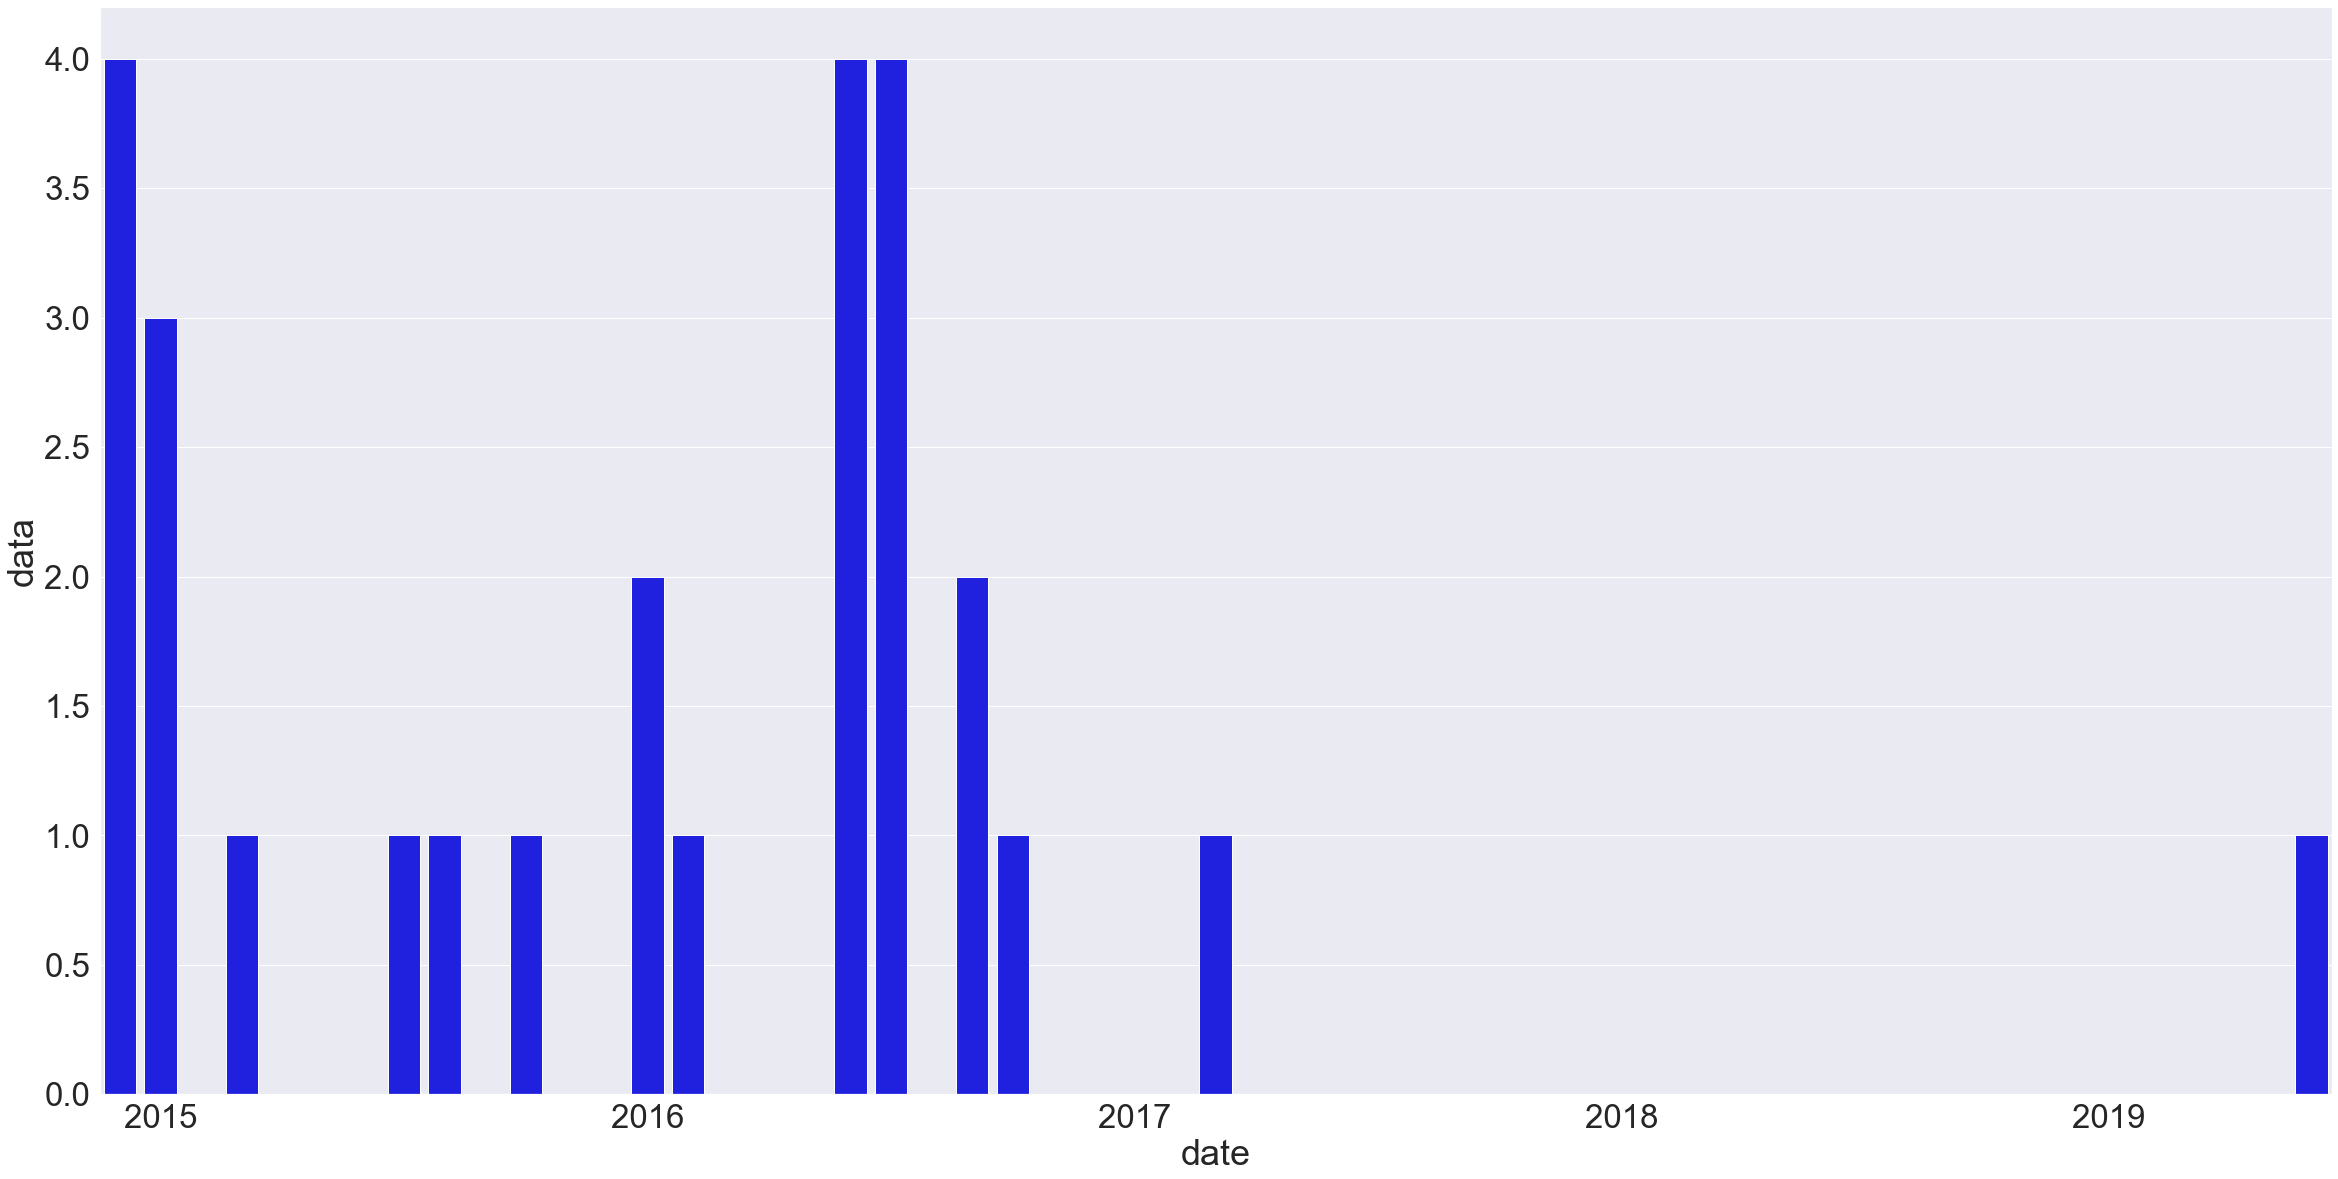

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(1, len(x_labels), step=12)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

In [14]:
#now by years

In [15]:
year_post_counts=df['data'].resample('YS').size()
year_post_counts

date
2015-01-01     8
2016-01-01     6
2017-01-01    12
2018-01-01     0
2019-01-01     0
2020-01-01     1
Freq: AS-JAN, Name: data, dtype: int64

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


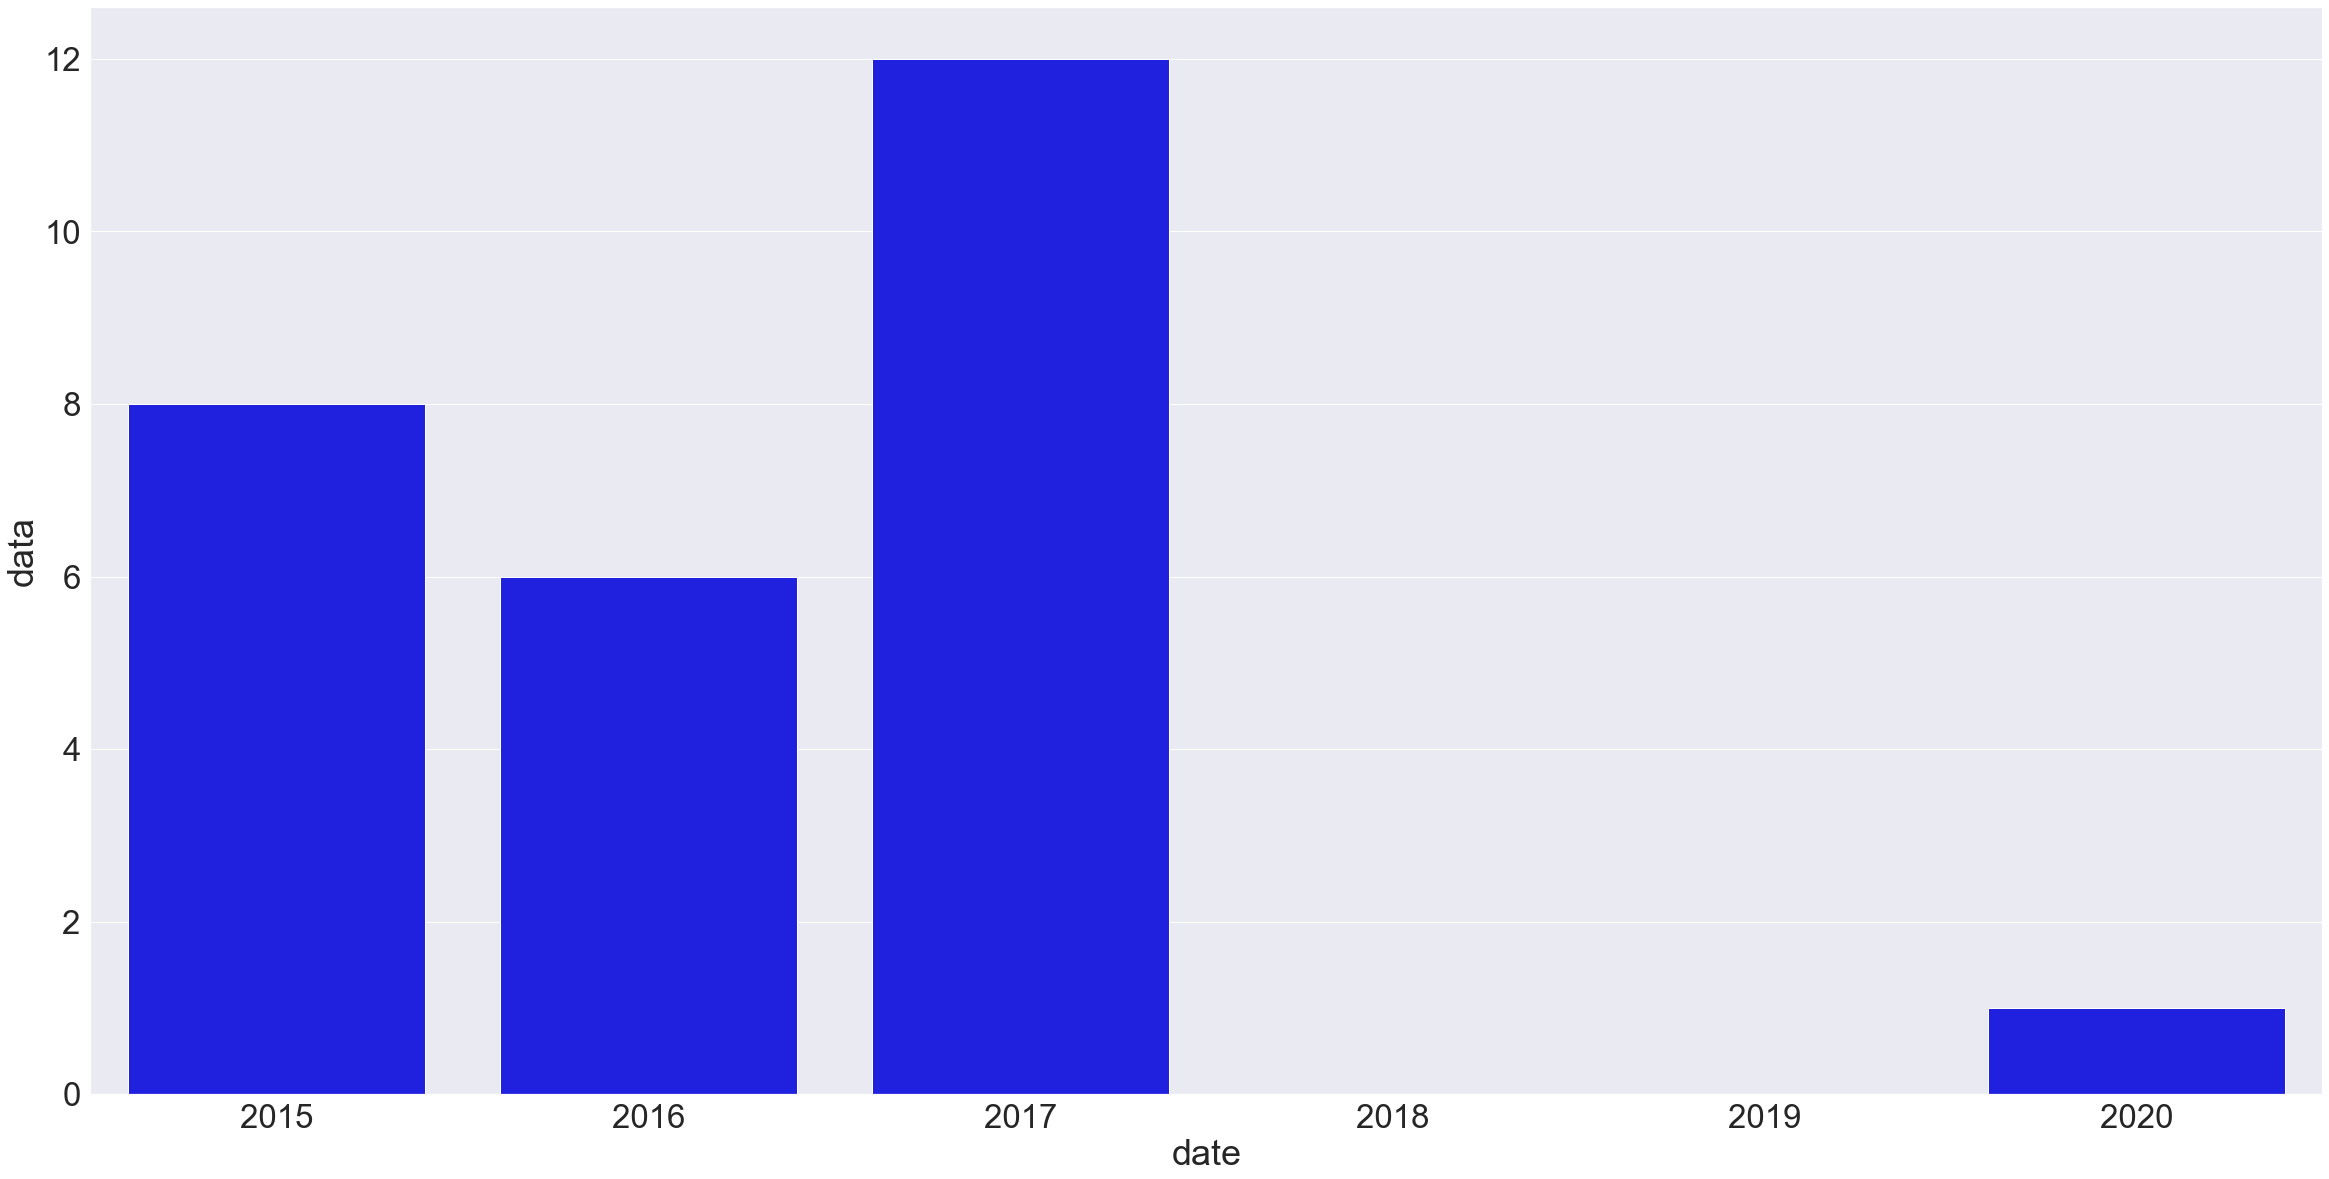

In [16]:
# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=3)

# set x labels
x_labels = year_post_counts.index

#create bar plot
sns.barplot(x_labels, year_post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(0, len(x_labels), step=1)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

In [17]:
df11=df_post['data'].to_dict()

In [18]:
df11

{0: [{'post': 'Feliz cumpleaÃ±os RaÃºl ð\x9f\x91\x8fð\x9f\x90\x9dð\x9f\x90\x9d'}],
 1: [{'post': 'Muchas felicidades Tere!!! Espero que todo vaya genial y siga aÃºn mejor! Un beso desde la Escandinavia profunda ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98'}],
 2: [{'post': 'Hola!\nUna investigadora vendrÃ¡ a finales de mayo, Â¿Alguien tiene una habitaciÃ³n libre en su piso para ella? Many Thanks! ð\x9f\x98\x99ð\x9f\x98\x84'}],
 3: [{'update_timestamp': 1491824289}],
 4: [{'update_timestamp': 1491170253}],
 5: [{'post': 'Â¿CÃ³mo va todo? Se que muchos estÃ¡is o estÃ¡bais por Galicia :D\n\nOs recuerdo, el proceso de MatriculaciÃ³n tiene unos plazos concretos: desde el lunes 13 febrero hasta el viernes 24 de febrero. \nLuego, el preiodo de cambios: del 27 de febrero hasta 3 de Marzo.\n\nPeriod to registration: 13th February - 24th February.\nPeriod to change courses: 27th February - 3rd March.\n\ndoubts and stuff:\ninternacional.palencia@uva.es.'}],
 6: [{'post': 'That Exhibition! \nDurante fe

In [19]:
df11[16]=[{'post': ''}]
df11[3]=[{'post': ''}]
df11[4]=[{'post': ''}]
df11[10]=[{'post': ''}]
df11[7]=[{'post': ''}]
df11[25]=[{'post': ''}]
df11

{0: [{'post': 'Feliz cumpleaÃ±os RaÃºl ð\x9f\x91\x8fð\x9f\x90\x9dð\x9f\x90\x9d'}],
 1: [{'post': 'Muchas felicidades Tere!!! Espero que todo vaya genial y siga aÃºn mejor! Un beso desde la Escandinavia profunda ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98'}],
 2: [{'post': 'Hola!\nUna investigadora vendrÃ¡ a finales de mayo, Â¿Alguien tiene una habitaciÃ³n libre en su piso para ella? Many Thanks! ð\x9f\x98\x99ð\x9f\x98\x84'}],
 3: [{'post': ''}],
 4: [{'post': ''}],
 5: [{'post': 'Â¿CÃ³mo va todo? Se que muchos estÃ¡is o estÃ¡bais por Galicia :D\n\nOs recuerdo, el proceso de MatriculaciÃ³n tiene unos plazos concretos: desde el lunes 13 febrero hasta el viernes 24 de febrero. \nLuego, el preiodo de cambios: del 27 de febrero hasta 3 de Marzo.\n\nPeriod to registration: 13th February - 24th February.\nPeriod to change courses: 27th February - 3rd March.\n\ndoubts and stuff:\ninternacional.palencia@uva.es.'}],
 6: [{'post': 'That Exhibition! \nDurante febrero estÃ¡ en marcha una exposiciÃ³n de

In [20]:
df12 = {k:v for k,v in df11.items() if v is not np.nan}

In [21]:
for _, val in df12.items():
    for i, items in enumerate(val):
        if 'update_timestamp' in items:
            del val[i]

In [22]:
df12

{0: [{'post': 'Feliz cumpleaÃ±os RaÃºl ð\x9f\x91\x8fð\x9f\x90\x9dð\x9f\x90\x9d'}],
 1: [{'post': 'Muchas felicidades Tere!!! Espero que todo vaya genial y siga aÃºn mejor! Un beso desde la Escandinavia profunda ð\x9f\x98\x98ð\x9f\x98\x98ð\x9f\x98\x98'}],
 2: [{'post': 'Hola!\nUna investigadora vendrÃ¡ a finales de mayo, Â¿Alguien tiene una habitaciÃ³n libre en su piso para ella? Many Thanks! ð\x9f\x98\x99ð\x9f\x98\x84'}],
 3: [{'post': ''}],
 4: [{'post': ''}],
 5: [{'post': 'Â¿CÃ³mo va todo? Se que muchos estÃ¡is o estÃ¡bais por Galicia :D\n\nOs recuerdo, el proceso de MatriculaciÃ³n tiene unos plazos concretos: desde el lunes 13 febrero hasta el viernes 24 de febrero. \nLuego, el preiodo de cambios: del 27 de febrero hasta 3 de Marzo.\n\nPeriod to registration: 13th February - 24th February.\nPeriod to change courses: 27th February - 3rd March.\n\ndoubts and stuff:\ninternacional.palencia@uva.es.'}],
 6: [{'post': 'That Exhibition! \nDurante febrero estÃ¡ en marcha una exposiciÃ³n de

In [23]:
dffinal=pd.DataFrame(df12)

In [24]:
dffinal=dffinal.T

In [25]:
dffinal['text']= [x['post'] for x in dffinal[0]]
dffinal['character_count']= dffinal['text'].str.len()
dffinal

,0,text,character_count
0,{'post': 'Feliz cumpleaÃ±os RaÃºl ððð'},Feliz cumpleaÃ±os RaÃºl ððð,36
1,{'post': 'Muchas felicidades Tere!!! Espero qu...,Muchas felicidades Tere!!! Espero que todo vay...,125
2,{'post': 'Hola! Una investigadora vendrÃ¡ a fi...,Hola!\nUna investigadora vendrÃ¡ a finales de ...,132
3,{'post': ''},,0
4,{'post': ''},,0
5,{'post': 'Â¿CÃ³mo va todo? Se que muchos estÃ¡...,Â¿CÃ³mo va todo? Se que muchos estÃ¡is o estÃ¡...,421
6,{'post': 'That Exhibition! Durante febrero es...,That Exhibition! \nDurante febrero estÃ¡ en ma...,374
7,{'post': ''},,0
8,"{'post': 'Hola a todos, Para el proceso de MA...","Hola a todos,\n\nPara el proceso de MATRICULAC...",531
9,{'post': 'Hola! Ya queda poco para que lleguÃ©...,"Hola!\nYa queda poco para que lleguÃ©is, Â¿Hay...",640


In [26]:
s = pd.to_numeric(dffinal['character_count'], errors='coerce')

m1 = (s< 20)
m2 = (s>= 20) & (s< 100)
m3 = (s>= 100)
masks = [m1,m2,m3]
vals = ['short post','normal post','quite long post']

dffinal['size']=np.select(masks, vals, default=1)
dffinal

,0,text,character_count,size
0,{'post': 'Feliz cumpleaÃ±os RaÃºl ððð'},Feliz cumpleaÃ±os RaÃºl ððð,36,normal post
1,{'post': 'Muchas felicidades Tere!!! Espero qu...,Muchas felicidades Tere!!! Espero que todo vay...,125,quite long post
2,{'post': 'Hola! Una investigadora vendrÃ¡ a fi...,Hola!\nUna investigadora vendrÃ¡ a finales de ...,132,quite long post
3,{'post': ''},,0,short post
4,{'post': ''},,0,short post
5,{'post': 'Â¿CÃ³mo va todo? Se que muchos estÃ¡...,Â¿CÃ³mo va todo? Se que muchos estÃ¡is o estÃ¡...,421,quite long post
6,{'post': 'That Exhibition! Durante febrero es...,That Exhibition! \nDurante febrero estÃ¡ en ma...,374,quite long post
7,{'post': ''},,0,short post
8,"{'post': 'Hola a todos, Para el proceso de MA...","Hola a todos,\n\nPara el proceso de MATRICULAC...",531,quite long post
9,{'post': 'Hola! Ya queda poco para que lleguÃ©...,"Hola!\nYa queda poco para que lleguÃ©is, Â¿Hay...",640,quite long post


In [27]:
sizes=[(dffinal['size']=='short post').sum(),(dffinal['size']=='normal post').sum(),(dffinal['size']=='quite long post').sum()]

In [28]:
sizes

[10, 7, 8]

In [29]:
labels = 'short post', 'normal post', 'quite long post'
explode = (0.01,0, 0)

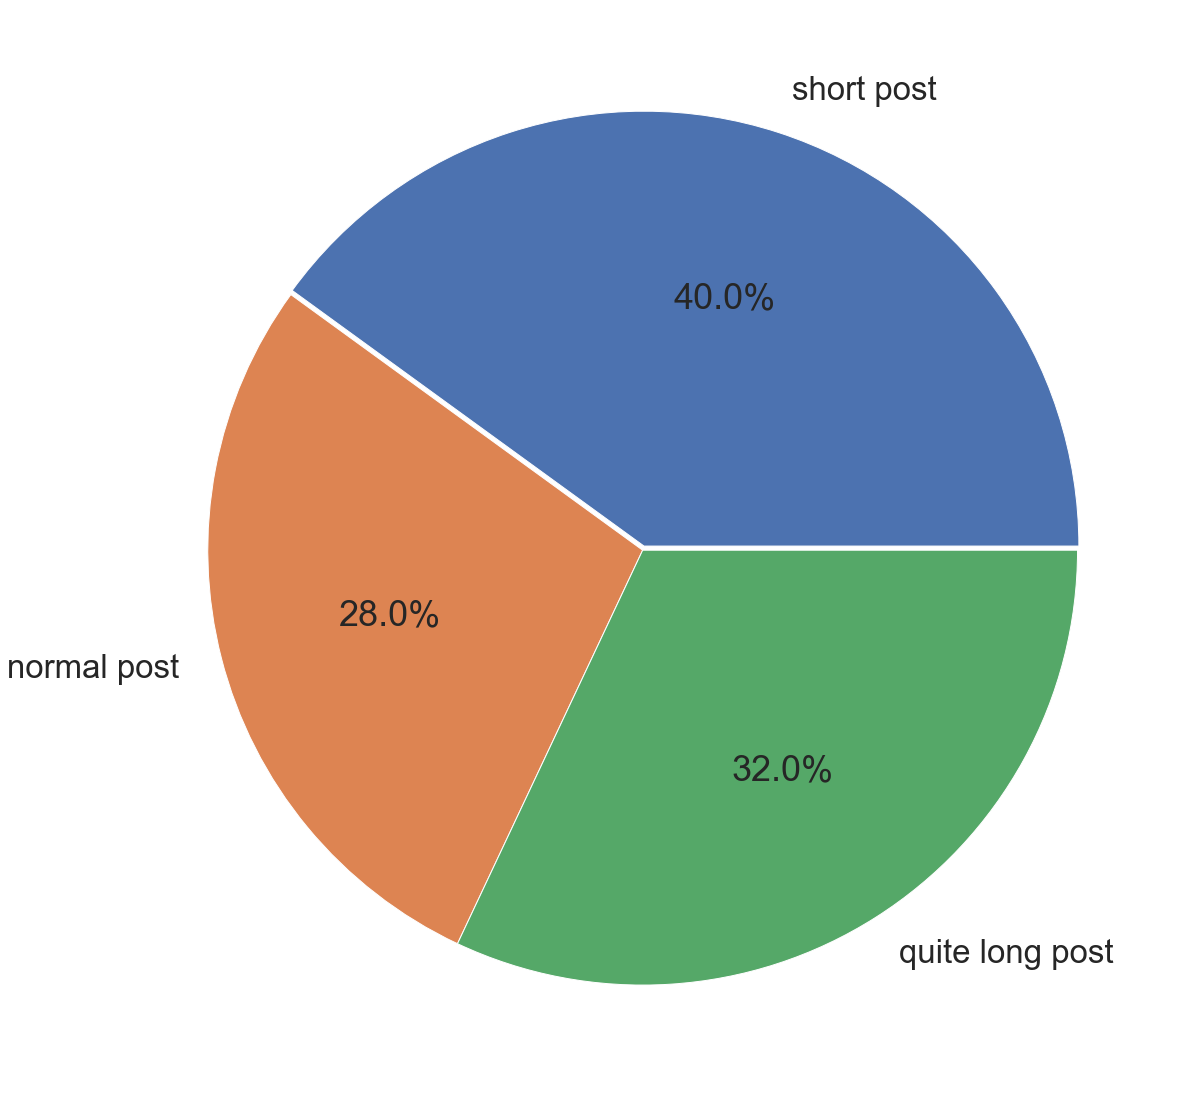

<Figure size 720x288 with 0 Axes>

In [30]:
fig4, ax4 = plt.subplots()
ax4.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%')
plt.figure(figsize=(10,4))
plt.show()

In [ ]:
plt.savefig('post_lenght_chart.png')